✅ Merged data shape: (1564, 31)

✅ Accuracy: 0.9872
📊 Confusion Matrix:
 [[298   1]
 [  3  11]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       299
           1       0.92      0.79      0.85        14

    accuracy                           0.99       313
   macro avg       0.95      0.89      0.92       313
weighted avg       0.99      0.99      0.99       313



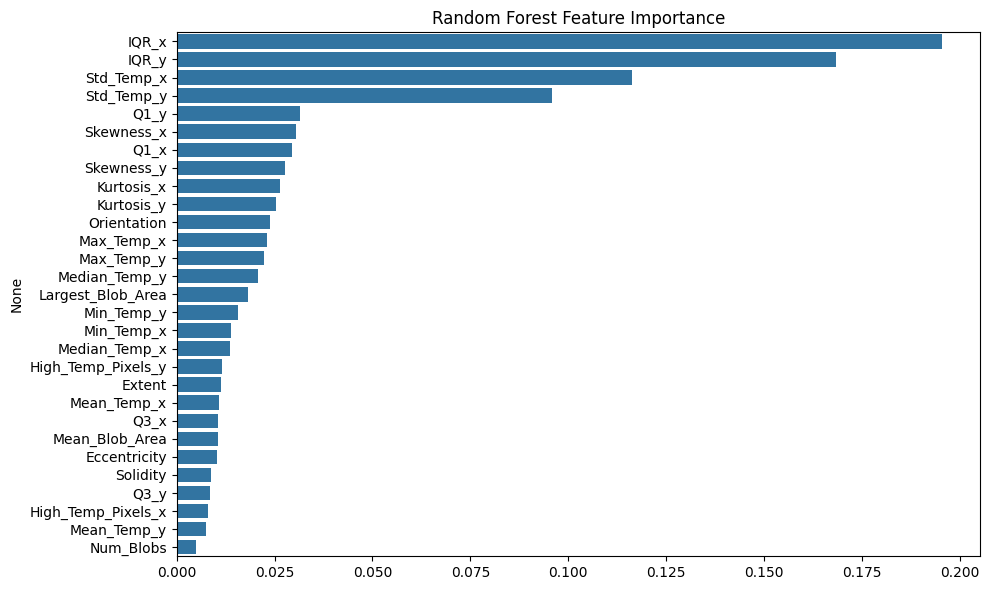

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load feature and label data
features_df = pd.read_csv("thermal_geometric_features.csv")
labels_df = pd.read_csv("labeled_thermal_features.csv")

# Merge on Frame name
labels_df["Frame"] = labels_df["Frame"].astype(str).apply(lambda x: f"Frame_{x}.csv" if not x.endswith(".csv") else x)
df = pd.merge(features_df, labels_df, on="Frame", how="inner")

print(f"✅ Merged data shape: {df.shape}")

# Split features/labels
X = df.drop(columns=["Frame", "Porosity Label"])
y = df["Porosity Label"]

# Normalize (optional for tree-based models, but can help later if switching models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\n✅ Accuracy: {acc:.4f}")
print("📊 Confusion Matrix:\n", cm)
print("\n📋 Classification Report:\n", report)

# Feature importance plot
importances = rf.feature_importances_
feature_names = X.columns
sorted_idx = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx])
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()
